# Hands-on Linear Regression Workshop
*Using the California Housing Dataset*

Welcome to our interactive session on linear regression! In this notebook, we'll:
- Learn the basics of linear regression.
- Compute the regression line manually.
- Verify our results using scikit-learn.
- Visualize our data, predictions, and residuals.
- Pause for quizzes and discussions to keep things interactive.

> **Note:** We’re using the California Housing dataset in this workshop. In this dataset, each row represents a block group in California. We’ll use **MedInc** (median income) as our predictor variable and **MedHouseVal** (median house value) as our target.

---

## Table of Contents
1. [Introduction to Linear Regression](#section1)
2. [Loading and Exploring the Dataset](#section2)
3. [Manual Calculation of Linear Regression](#section3)
4. [Visualizing the Regression Line](#section4)
5. [Using scikit-learn for Linear Regression](#section5)
6. [Exploring Residuals and Model Diagnostics](#section6)
7. [Wrap-up, Quiz, and Discussion](#section7)
8. [Additional Exercises](#section8)


## 1. Introduction to Linear Regression <a id="section1"></a>

In linear regression, we model the relationship between an outcome variable `y` and an explanatory variable `x` using a straight line: $y = \beta_0 + \beta_1 x$

- **$beta_0 (Intercept)$:** The predicted value of `y` when \(x=0\).
- **\(\beta_1\) (Slope):** The change in `y` for a one-unit change in `x`.

> **Discussion:**
> *Can you think of an example in everyday life where one quantity might change in a linear way with another? How might that relationship look?*


    ## 2. Loading and Exploring the Dataset <a id="section2"></a>

We'll use the California Housing dataset. For this workshop, we’ll focus on:
- **Predictor (x):** `MedInc` (median income in a block group)
- **Target (y):** `MedHouseVal` (median house value in that block group)

Let’s start by loading and exploring the dataset.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a nice plotting style and enable inline plots
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

# Load the California housing dataset from scikit-learn
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True)

# Create a DataFrame for easier exploration
df = california.frame

# Display the first 5 rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


> **Quiz:**
> **Question:** What does each row in this dataset represent?
>
> A) A single attribute of California
>
> B) A block group with various housing and demographic features
>
> C) A predicted value of house prices
>
> *Take a moment to discuss your answer with a neighbor. (Answer: ??)*

## 3. Manual Calculation of Linear Regression <a id="section3"></a>

### 3.1. Select Predictor and Target

For our analysis, we choose:
- **x:** `MedInc` (median income)
- **y:** `MedHouseVal` (median house value)

Let's extract these from our DataFrame.


In [3]:
# Extracting the predictor and target variables
x = df['MedInc'].values    # Predictor: Median Income
y = df['MedHouseVal'].values   # Target: Median House Value

# Quick look at the first few values
print("First 5 values of MedInc (x):", x[:5])
print("First 5 values of MedHouseVal (y):", y[:5])

First 5 values of MedInc (x): [8.3252 8.3014 7.2574 5.6431 3.8462]
First 5 values of MedHouseVal (y): [4.526 3.585 3.521 3.413 3.422]


### 3.2. Compute the Means

We need the average of `x` and `y`:


In [4]:
# Calculate the means of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

print("Mean of MedInc (x):", mean_x)
print("Mean of MedHouseVal (y):", mean_y)

Mean of MedInc (x): 3.8706710029069766
Mean of MedHouseVal (y): 2.068558169089147


### 3.3. Calculate the Slope (\(\beta_1\))

The formula for the slope is:

\[
\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\]


In [5]:
# Calculate the numerator and denominator for the slope
numerator = np.sum((x - mean_x) * (y - mean_y))
denom = np.sum((x - mean_x) ** 2)

# Compute the slope (β1)
slope = numerator / denom
print("Calculated slope (β1):", slope)


Calculated slope (β1): 0.41793849201896244


### 3.4. Calculate the Intercept (\(\beta_0\))

Using the formula:

\[
\beta_0 = \bar{y} - \beta_1 \bar{x}
\]


In [6]:
# Compute the intercept (β0)
intercept = mean_y - slope * mean_x
print("Calculated intercept (β0):", intercept)


Calculated intercept (β0): 0.45085576703268027


> **Discussion:**
> *Looking at the computed slope and intercept, what do these numbers suggest about the relationship between median income and median house value?*


## 4. Visualizing the Regression Line <a id="section4"></a>

Now that we have our regression parameters, we can predict house values and plot our regression line on the data.


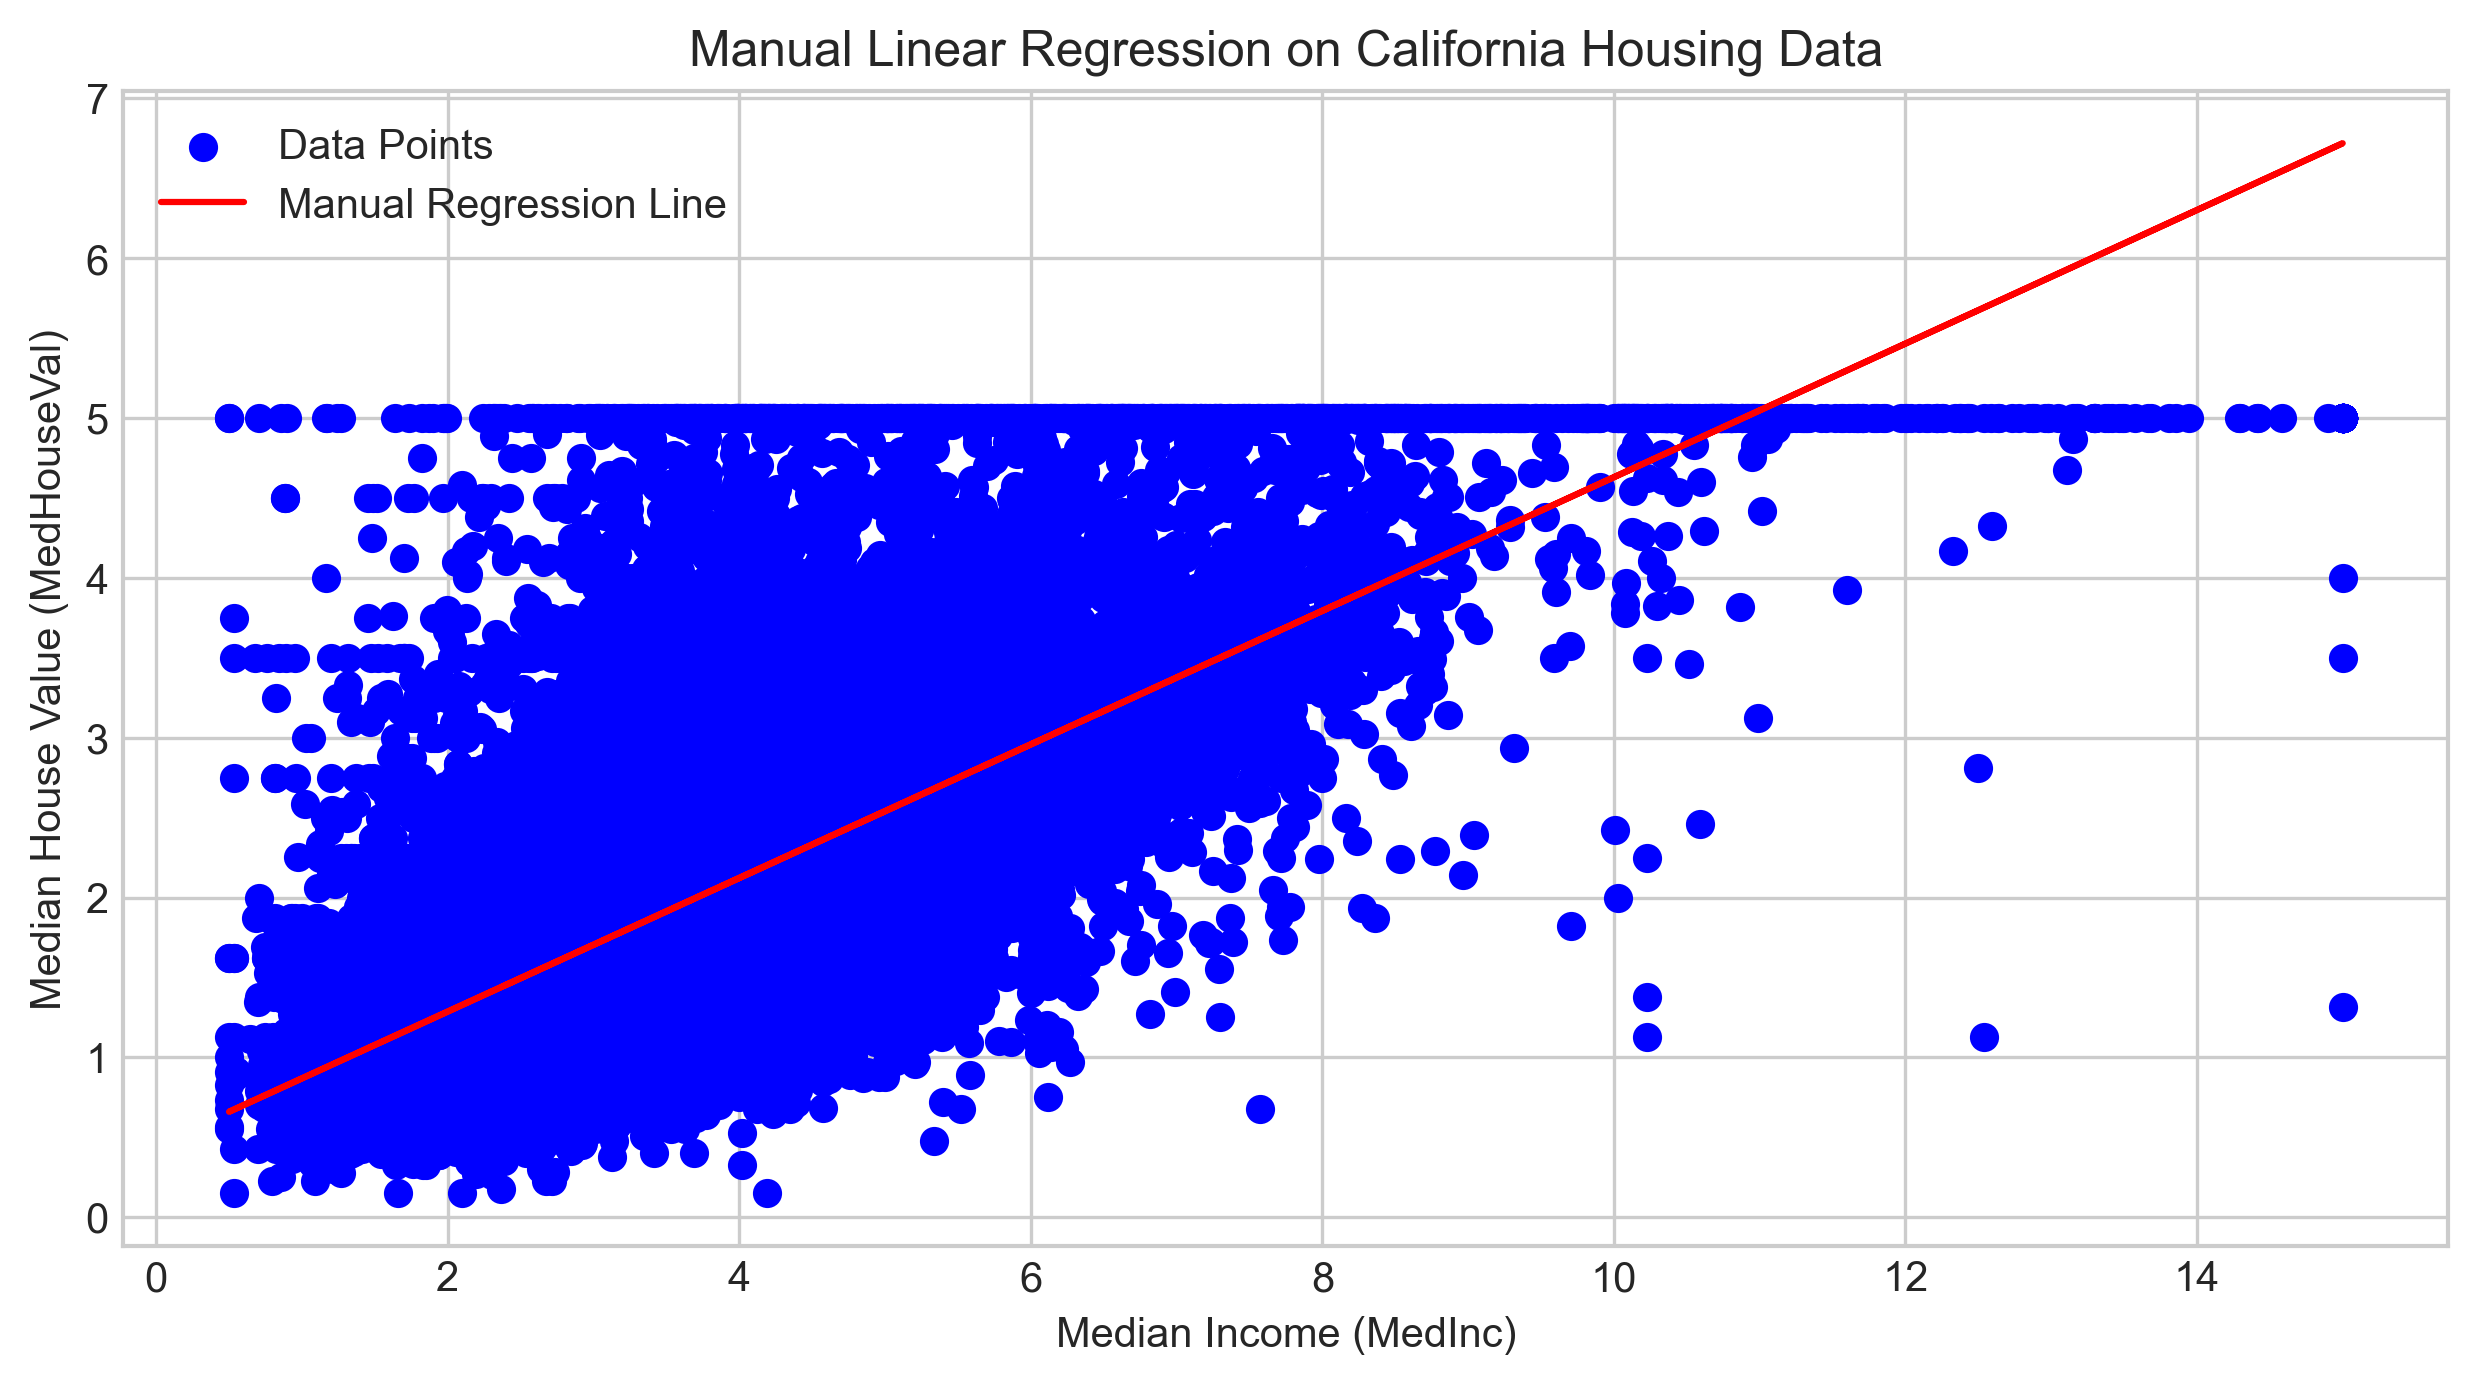

In [7]:
# Compute predicted values using our manual model
y_pred_manual = intercept + slope * x

# Plot the data points and the manual regression line
plt.figure(figsize=(10, 5), dpi=300)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred_manual, color='red', label='Manual Regression Line')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value (MedHouseVal)')
plt.title('Manual Linear Regression on California Housing Data')
plt.legend()
plt.show()
